<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Regresi%C3%B3n_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias

In [2]:
#Scikit-learn
import sklearn

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# Importando el dataset

In [63]:
#Montar Drive y leer datos
data = pd.read_csv("drive/MyDrive/CURSOS/MACHINE LEARNING/Data/train_titanic.csv",delimiter=",")
target = "Survived"

In [5]:
data.shape

(891, 12)

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
data.groupby(["Pclass"]).agg({"PassengerId":"count",
                              "Fare":"mean",
                              "Age":"mean",
                              "Survived":"mean"}).reset_index()

,Pclass,PassengerId,Fare,Age,Survived
0,1,216,84.154687,38.233441,0.629630
1,2,184,20.662183,29.877630,0.472826
2,3,491,13.675550,25.140620,0.242363


In [10]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)
sns.set(rc={"figure.figsize":(10,6)})

<Axes: xlabel='Survived', ylabel='count'>

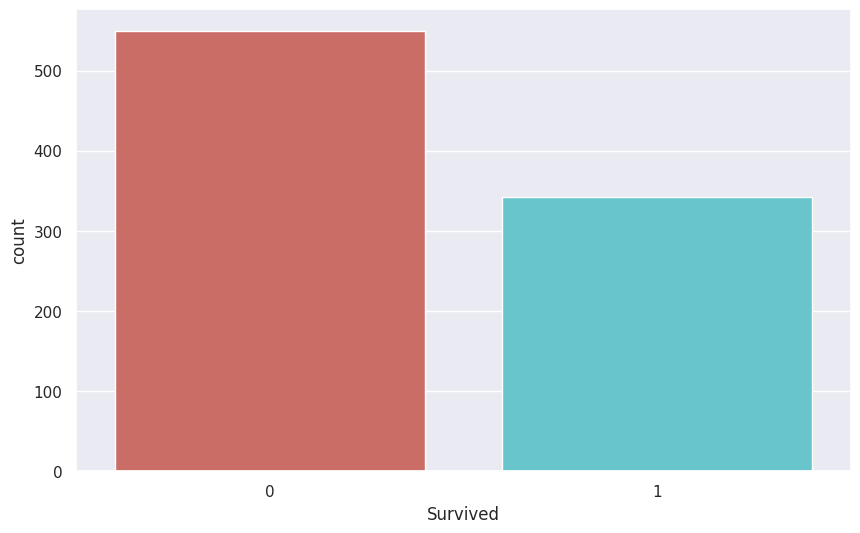

In [11]:
# Analizano el target
sns.countplot(x="Survived",data=data,palette="hls")

# Analisis de variables categoricas

<Axes: xlabel='Sex', ylabel='count'>

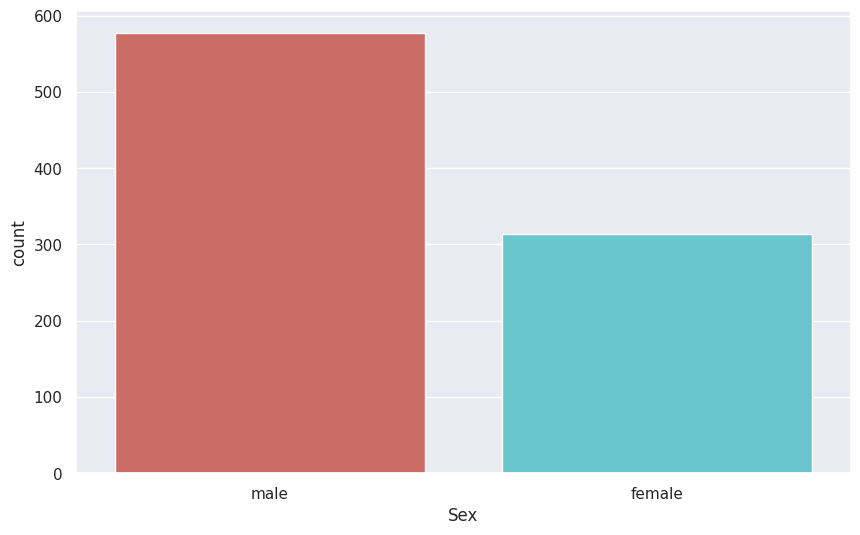

In [12]:
sns.countplot(x="Sex",data=data,palette="hls")

In [13]:
res = data.groupby(["Sex"]).agg({"PassengerId":"count",
                                 "Survived":"mean"}).reset_index()
                        
res              

,Sex,PassengerId,Survived
0,female,314,0.742038
1,male,577,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

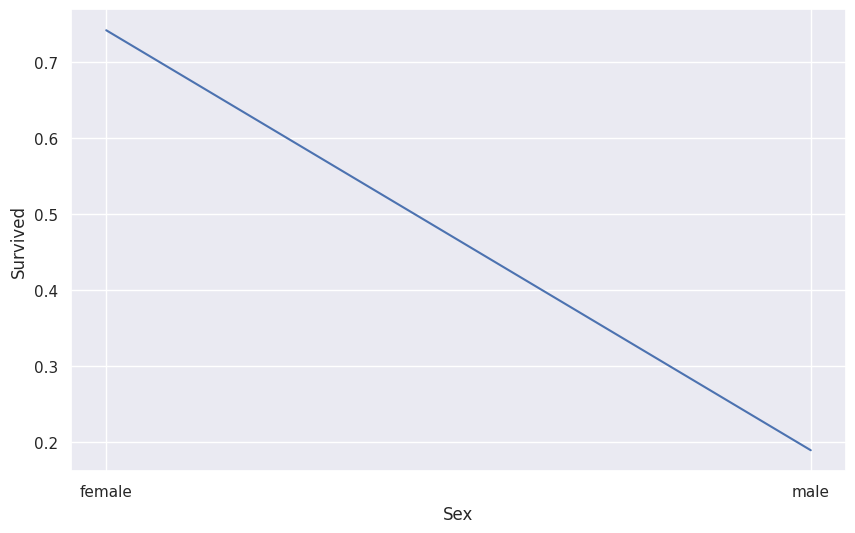

In [14]:
sns.lineplot(x="Sex",y="Survived",data=res)

<Axes: xlabel='Pclass', ylabel='Survived'>

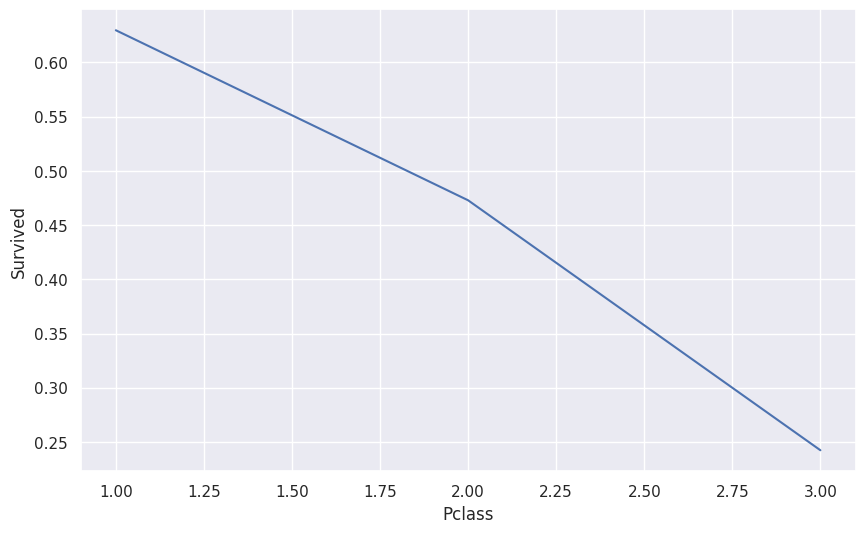

In [16]:
sns.lineplot(x="Pclass",y="Survived",data=data.groupby(["Pclass"]).agg({"PassengerId":"count","Survived":"mean"}).reset_index())

# Analisis de variables numericas

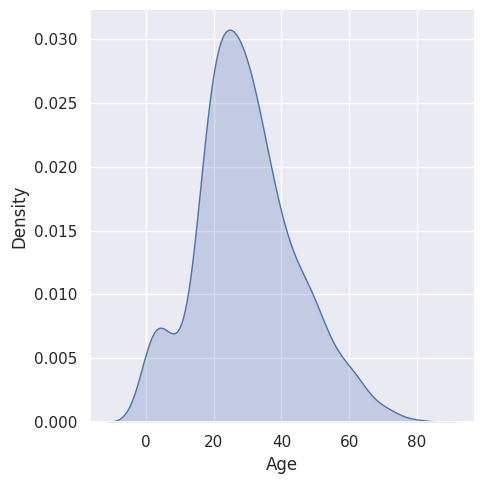

In [17]:
sns.displot(data,x="Age",kind="kde",fill=True)

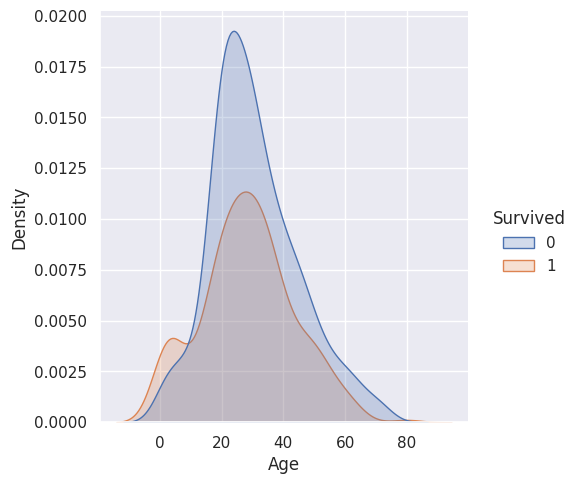

In [18]:
sns.displot(data,x="Age",hue="Survived",kind="kde",fill=True)

<Axes: xlabel='Survived', ylabel='Age'>

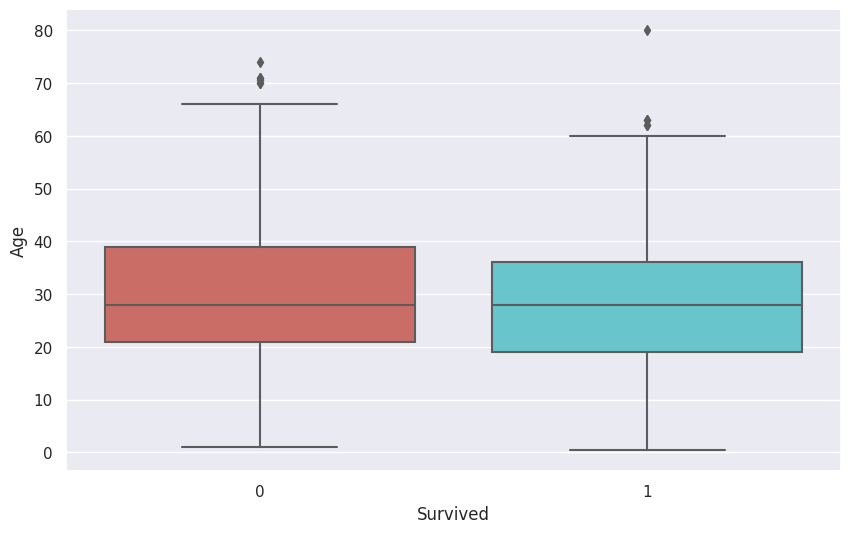

In [19]:
sns.boxplot(x="Survived",y="Age",data=data,palette="hls")

In [20]:
#Imputando los missings por la media
data["Fare"].fillna(data["Fare"].mean())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [21]:
data["Fare"].apply(lambda x:1 if x<100 else 2)

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Fare, Length: 891, dtype: int64

<ipython-input-22-d5e0f22ee146>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["edad_cat"] = data.Age.apply(lambda x: catedad(x))


<Axes: xlabel='edad_cat', ylabel='Survived'>

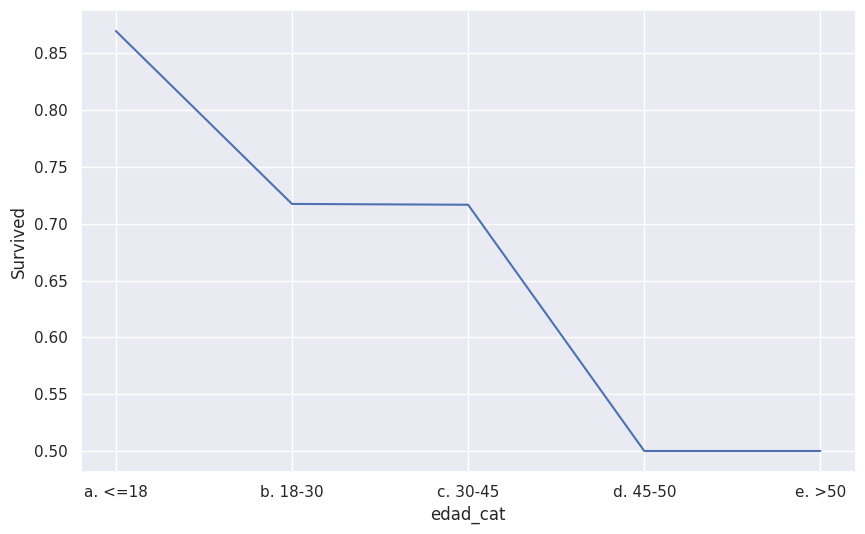

In [22]:
from math import isnan

def catedad(x):
  if isnan(x):
    return "missing"
  elif x<=18:
    return "a. <=18"
  elif x<=30:
    return "b. 18-30"
  elif x<=45:
    return "c. 30-45"
  elif x<=50:
    return "d. 45-50"
  else:
    return "e. >50"

temp = data.copy()
temp = data.dropna()
temp["edad_cat"] = data.Age.apply(lambda x: catedad(x))

sns.lineplot(x="edad_cat", y="Survived", data=temp.groupby(["edad_cat"]).agg({"PassengerId":"count",
                                                                              "Survived":"mean"}).reset_index())

In [23]:
temp.groupby(["edad_cat"]).agg({"PassengerId":"count","Survived":"mean"}).reset_index()

,edad_cat,PassengerId,Survived
0,a. <=18,23,0.869565
1,b. 18-30,46,0.717391
2,c. 30-45,60,0.716667
3,d. 45-50,22,0.500000
4,e. >50,32,0.500000


In [26]:
#Discretizar variable
from sklearn.preprocessing import KBinsDiscretizer

data["Age_cat"] = KBinsDiscretizer(n_bins=6,
                                   encode="ordinal",
                                   strategy="quantile").fit_transform(data[["Age"]].fillna(data[["Age"]].mean()))

<ipython-input-27-1c6c33b7da54>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data["Age_cat"], palette="hls", discrete=True)


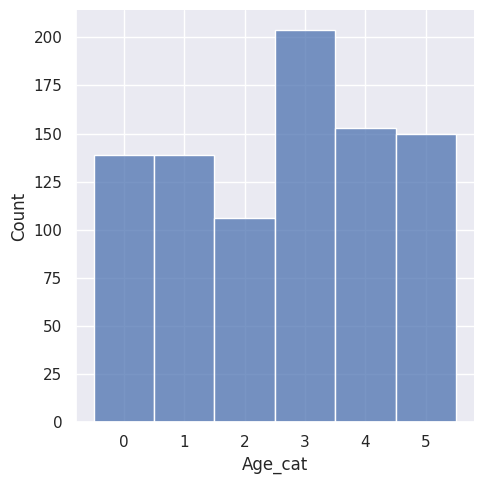

In [27]:
sns.displot(data["Age_cat"], palette="hls", discrete=True)

In [28]:
data[["Age","Age_cat","Survived"]]

,Age,Age_cat,Survived
0,22.0,1.0,0
1,38.0,4.0,1
2,26.0,2.0,1
3,35.0,4.0,1
4,35.0,4.0,0
...,...,...,...
886,27.0,2.0,0
887,19.0,1.0,1
888,NaN,3.0,0
889,26.0,2.0,1


In [29]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_cat']

In [31]:
aggregations = {"Survived":"mean","PassengerId":"count"}
res = data.groupby("Age_cat").agg(aggregations).reset_index()

In [32]:
res.head()

,Age_cat,Survived,PassengerId
0,0.0,0.503597,139
1,1.0,0.345324,139
2,2.0,0.358491,106
3,3.0,0.303922,204
4,4.0,0.450980,153


<Axes: xlabel='Age_cat', ylabel='Survived'>

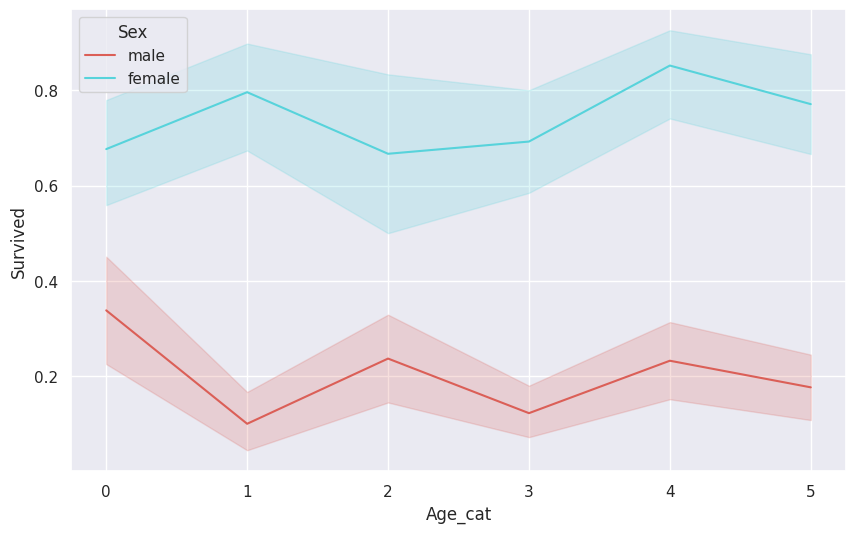

In [33]:
#Ratio del evento por tramo de la variable numerica
sns.lineplot(data=data, x="Age_cat", y="Survived", palette="hls", hue="Sex")

# Analisis multivariado

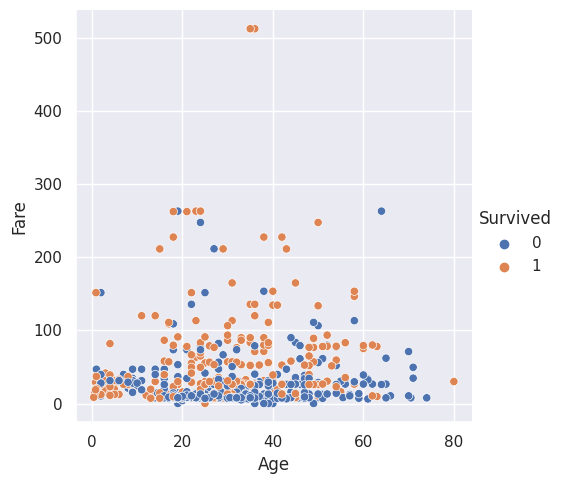

In [34]:
sns.relplot(data=data,x="Age",y="Fare",hue="Survived")

# Muestreo

In [71]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               test_size=0.3,
                               random_state=123)

# Tratamiento de variables

In [ ]:
#Es importante primero revisar en el dataset que las variables numericas sean realmente así, y no sean de tipo string, o viceversa.
data.select_dtypes("object")

In [36]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age_cat        float64
dtype: object

In [38]:
numFeatures = ["Age","Fare","SibSp","Parch"]
catFeatures = ["Pclass","Sex","Embarked"]

In [39]:
#Pclass es una variable categórica, pero inicialmente está configurado como numerica
data[catFeatures]

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
886,2,male,S
887,1,female,S
888,3,female,S
889,1,male,C


# Encoding de variables categoricas


[Tipos de encodings](https://pub.towardsai.net/5-useful-encoding-techniques-in-machine-learning-f735567399f4)

## Label y one hot encoding

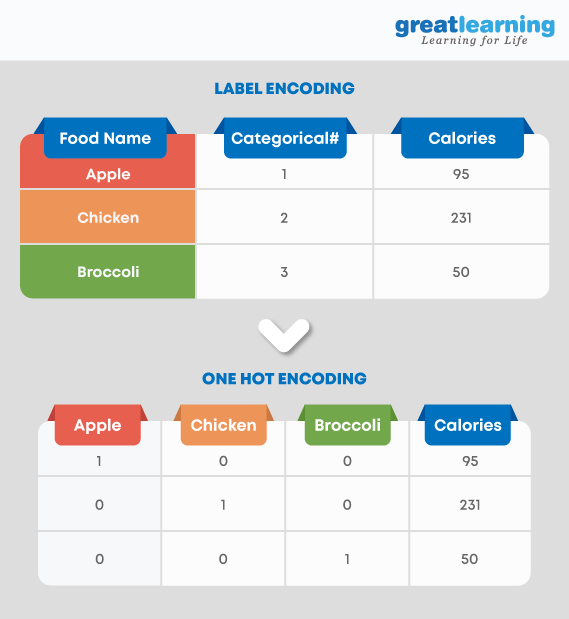

## Target encoding

[Ir a enlace](https://dev.to/berk_hakbilen/dealing-with-categorical-data-encoding-features-for-ml-agorithms-43pp)


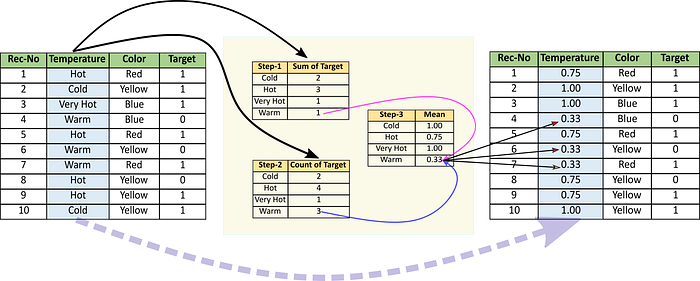

* WoEEncoder

se aplica logaritmo al ratio para suavizar

In [47]:
#Reemplazar las filas NaN por una categoria especifica
for i in catFeatures:
  data[i] = data[i].replace(np.nan,"missing")

data[catFeatures].drop_duplicates()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


In [53]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder(sparse_output=True)

In [74]:
OneHotEncoder.fit(train[catFeatures])

train[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(train[catFeatures]).toarray()
test[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(test[catFeatures]).toarray()

In [ ]:
data.head()

In [ ]:
# Target encoding (es importante hacer el particionamiento de la data en train y test)
!pip install category_encoders

In [79]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [80]:
#El calculo del target se tiene que hacer en train y la aplicacion, se hace por separado (train y test)
encoder.fit(train[catFeatures].astype("category"), train[target])
train[[x + "_coded" for x in catFeatures]] = encoder.transform(train[catFeatures]).astype("category")
test[[x + "_coded" for x in catFeatures]] = encoder.transform(test[catFeatures]).astype("category")
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_coded,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,...,0.345055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,...,0.559610,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,...,0.559610,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,...,0.345055,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,...,0.559610,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [81]:
test[["Sex","Sex_coded"]].drop_duplicates()

,Sex,Sex_coded
172,female,0.743243
524,male,0.197007


In [82]:
test[["Pclass","Pclass_coded"]].drop_duplicates()

,Pclass,Pclass_coded
172,3,0.259366
452,1,0.639455
397,2,0.465115


# Tratamiento de variables numericas